In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [8]:
df_diabetes = pd.read_csv("diabetes_prediction_dataset.csv")

In [9]:
#1 eliminate duplicates
df_diabetes = df_diabetes.drop_duplicates()

#2 encode necessary labels
le_encoder = LabelEncoder()
df_diabetes['gender'] = le_encoder.fit_transform(df_diabetes['gender'])
df_diabetes['smoking_history'] = le_encoder.fit_transform(df_diabetes['smoking_history'])

#3 Outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.25 * IQR
    upper_bound = Q3 + 1.25 * IQR
    data[column] = data[column].clip(lower_bound, upper_bound)
    return data

for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    df_diabetes = cap_outliers(df_diabetes, col)

#4 Scale values
scaler = StandardScaler()
df_diabetes[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level',]] = scaler.fit_transform(df_diabetes[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level',]])

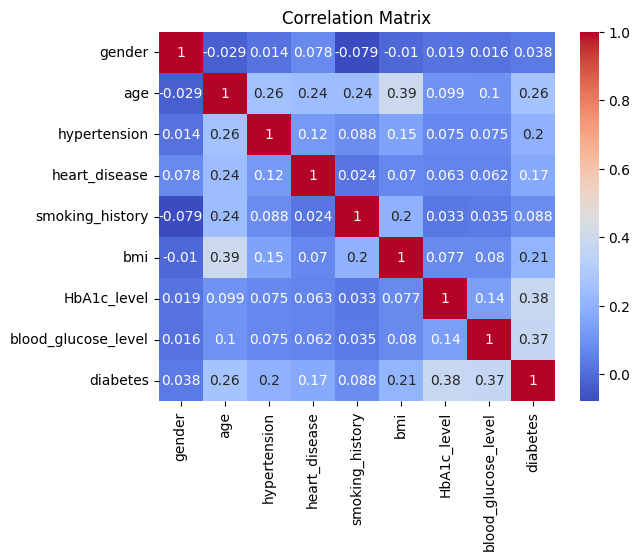

In [10]:
# corr plot
sns.heatmap(df_diabetes.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()